In [22]:
# Loading Libraries

import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import calendar

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\ASHUTOSH DAS\\Documents\\Machine Hack'

In [64]:
# Loading Datasets

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [12]:
df_train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


# Initial Analysis

In [65]:
# Dropping un-necessary columns

df_train.drop(['session_id','session_number','client_agent'], axis=1, inplace=True)

In [66]:
df_test.drop(['session_id','session_number','client_agent'],axis=1, inplace=True)

In [67]:
# Checking the Number of Unique Entries in the columns 'device_details'

df_train.groupby(['device_details']).size().sort_values(ascending=False)

device_details
iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
dtype: int64

In [68]:
# Splitting Date column into Month,Date and Year 

Month_of_Year = []
Date_of_Month = []
Year_Tranc = []

for i in df_train['date']:
    x = i.split('-')
    Year_Tranc.append(x[0])
    Month_of_Year.append(x[1])
    Date_of_Month.append(x[2])
    

df_train['month_of_year'] = pd.DataFrame(Month_of_Year)
df_train['date_of_month'] = pd.DataFrame(Date_of_Month)
df_train['year_tranc'] = pd.DataFrame(Year_Tranc)

df_train.head()

,device_details,date,purchased,added_in_cart,checked_out,time_spent,month_of_year,date_of_month,year_tranc
0,Desktop - Chrome,2020-01-22,1,0,0,236.886,01,22,2020
1,iPhone - iOS,2020-02-27,1,0,0,1277.455,02,27,2020
2,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,08,01,2019
3,Desktop - IE,2019-12-30,0,1,0,455.201,12,30,2019
4,iPhone - Web,2019-09-10,0,0,0,1164.877,09,10,2019


In [69]:
tranc = datetime.strptime(df_train['date'][2], '%Y-%m-%d')
wk = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
tranc.weekday()
wk[3]

'Thursday'

In [70]:
# Extracting Day of Week from the Date

Day_Week = []

for i in df_train['date']:
    tranc = datetime.strptime(i, '%Y-%m-%d')
    wk = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    Day_Week.append(wk[tranc.weekday()])
    
df_train['day_of_week'] = pd.DataFrame(Day_Week)

In [71]:
df_train.head()

,device_details,date,purchased,added_in_cart,checked_out,time_spent,month_of_year,date_of_month,year_tranc,day_of_week
0,Desktop - Chrome,2020-01-22,1,0,0,236.886,01,22,2020,Wednesday
1,iPhone - iOS,2020-02-27,1,0,0,1277.455,02,27,2020,Thursday
2,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,08,01,2019,Thursday
3,Desktop - IE,2019-12-30,0,1,0,455.201,12,30,2019,Monday
4,iPhone - Web,2019-09-10,0,0,0,1164.877,09,10,2019,Tuesday


In [72]:
# Dropping the Date Column from the Train Data

df_train.drop('date',axis=1,inplace=True)
df_train.head()

,device_details,purchased,added_in_cart,checked_out,time_spent,month_of_year,date_of_month,year_tranc,day_of_week
0,Desktop - Chrome,1,0,0,236.886,01,22,2020,Wednesday
1,iPhone - iOS,1,0,0,1277.455,02,27,2020,Thursday
2,iPhone - MobileWeb,0,0,0,21.704,08,01,2019,Thursday
3,Desktop - IE,0,1,0,455.201,12,30,2019,Monday
4,iPhone - Web,0,0,0,1164.877,09,10,2019,Tuesday


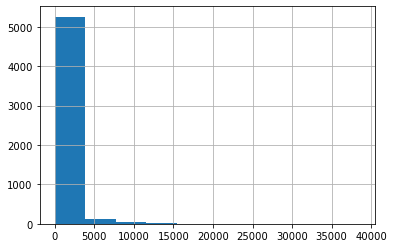

In [42]:
# Target Variable Distribution

%matplotlib inline
df_train['time_spent'].hist()

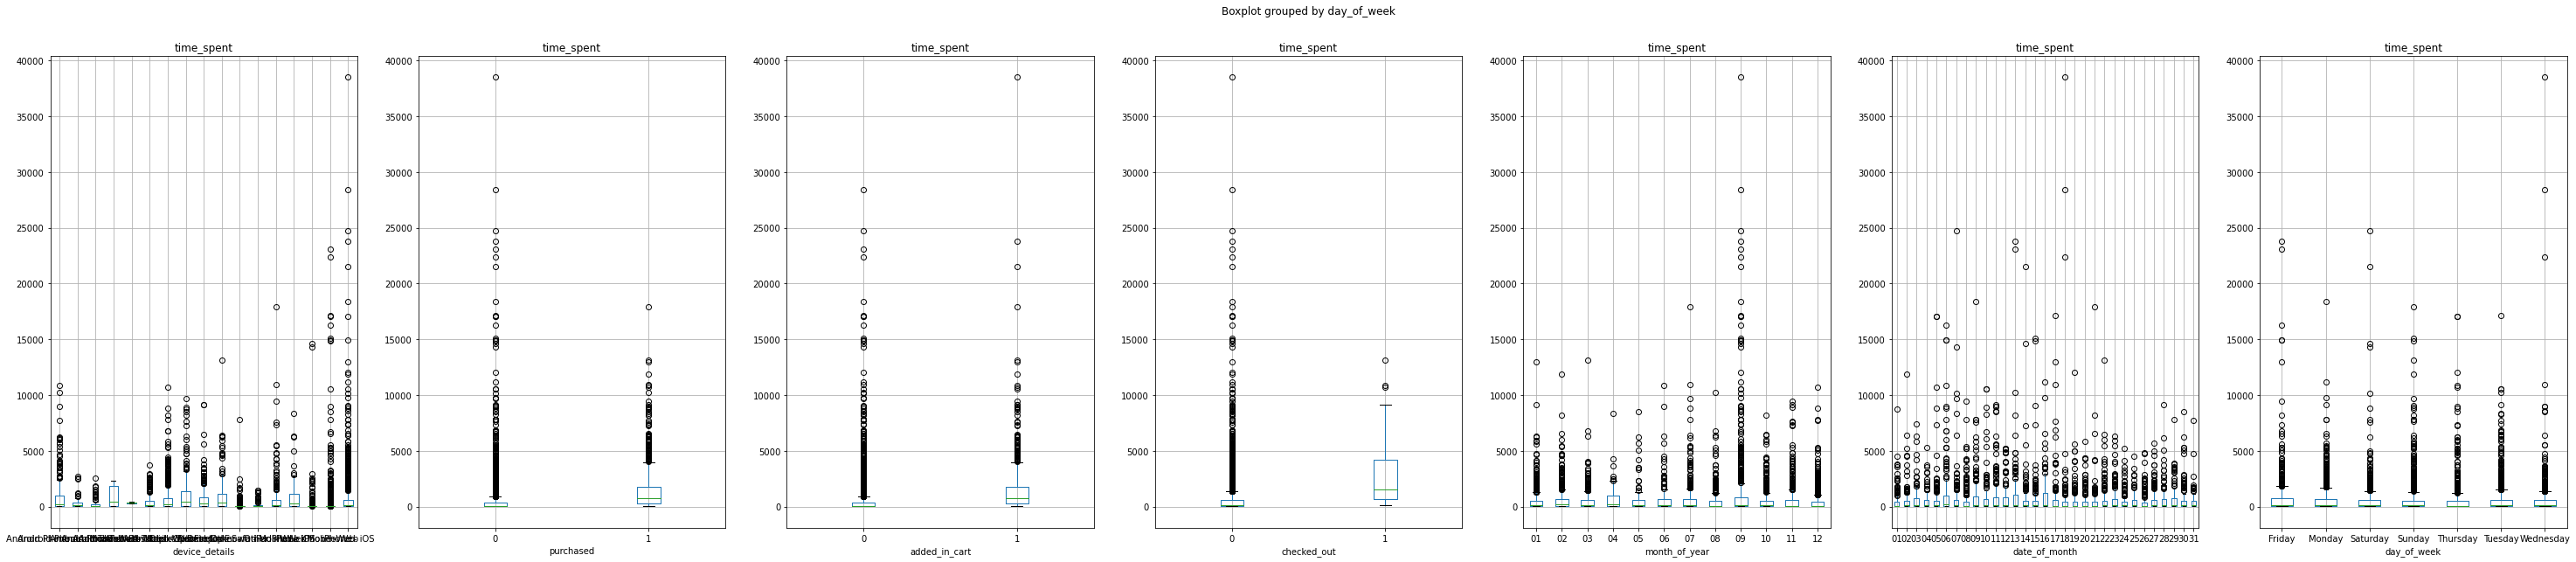

In [47]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['device_details', 'purchased', 'added_in_cart', 'checked_out', 'month_of_year', 'date_of_month', 'day_of_week']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df_train.boxplot(column='time_spent', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [93]:
df_train.groupby('date_of_month').agg({'time_spent':'mean'}).sort_values(by='time_spent',ascending=False)

,time_spent
date_of_month,
18,1126.020927
06,1086.212726
13,1071.942815
09,925.266527
16,894.303254
11,876.029086
17,836.475208
07,834.566983
10,755.781229


In [81]:
df_train.groupby('day_of_week').agg({'time_spent':'mean'}).sort_values(by='time_spent',ascending=False)

,time_spent
day_of_week,
Friday,744.140161
Monday,677.894517
Tuesday,666.435814
Saturday,663.812399
Sunday,648.261422
Thursday,629.013922
Wednesday,620.342142


In [82]:
df_train['day_of_week'].replace({'Friday':7, 'Monday':6,'Saturday':4,'Sunday':3,'Thursday':2,'Tuesday':5,'Wednesday':1},inplace=True)

In [83]:
df_train.head()

,device_details,purchased,added_in_cart,checked_out,time_spent,month_of_year,date_of_month,year_tranc,day_of_week
0,Desktop - Chrome,1,0,0,236.886,01,22,2020,1
1,iPhone - iOS,1,0,0,1277.455,02,27,2020,2
2,iPhone - MobileWeb,0,0,0,21.704,08,01,2019,2
3,Desktop - IE,0,1,0,455.201,12,30,2019,6
4,iPhone - Web,0,0,0,1164.877,09,10,2019,5


In [84]:
df_train.drop(['year_tranc'],axis=1,inplace=True)

In [85]:
df_train.groupby('device_details').agg({'time_spent':'mean'}).sort_values(by = 'time_spent',ascending=False)

,time_spent
device_details,
Desktop - Firefox,1091.358081
iPad - iOS,945.288727
Android Phone - Android,883.049902
Desktop - Safari,855.816930
Android Tablet - Android,821.052000
iPhone - iOS,754.639169
Desktop - IE,716.524606
iPad - Web,711.239830
Desktop - Chrome,660.397282


In [86]:
df_train['device_details'].replace({
    'Desktop - Firefox':17,'iPad - iOS':16,'Android Phone - Android':15,'Desktop - Safari':14,'Android Tablet - Android':13,
    'iPhone - iOS':12,'Desktop - IE':11,'iPad - Web':10,'Desktop - Chrome':9,'iPhone - Web':8,'Android Tablet - Web':7,
    'Android Phone - MobileWeb':6, 'Android Tablet - MobileWeb':5, 'Android Phone - Web':4, 'iPhone - MobileWeb':3,
    'Unknown - MobileWeb':2, 'Other - Other':1
}, inplace = True)

In [91]:
df_train.head()

,device_details,purchased,added_in_cart,checked_out,time_spent,month_of_year,date_of_month,day_of_week
0,9,1,0,0,236.886,01,22,1
1,12,1,0,0,1277.455,02,27,2
2,3,0,0,0,21.704,08,01,2
3,11,0,1,0,455.201,12,30,6
4,8,0,0,0,1164.877,09,10,5


In [94]:
df_train['dev_day_rel'] = pd.DataFrame(df_train['device_details']*df_train['day_of_week'])
df_train.head()

,device_details,purchased,added_in_cart,checked_out,time_spent,month_of_year,date_of_month,day_of_week,dev_day_rel
0,9,1,0,0,236.886,01,22,1,9
1,12,1,0,0,1277.455,02,27,2,24
2,3,0,0,0,21.704,08,01,2,6
3,11,0,1,0,455.201,12,30,6,66
4,8,0,0,0,1164.877,09,10,5,40


# Statistical Featue Selection

In [95]:
# ANOVA Test

# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [97]:
CategoricalPredictorList=['device_details', 'purchased', 'month_of_year', 'date_of_month', 'added_in_cart', 'checked_out','day_of_week','dev_day_rel']
FunctionAnova(inpData=df_train, 
              TargetVariable='time_spent', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

device_details is correlated with time_spent | P-Value: 9.390564903895913e-11
purchased is correlated with time_spent | P-Value: 1.769907008735301e-50
month_of_year is correlated with time_spent | P-Value: 3.377382168394899e-19
date_of_month is correlated with time_spent | P-Value: 3.2359030328863606e-05
added_in_cart is correlated with time_spent | P-Value: 4.574921934432706e-55
checked_out is correlated with time_spent | P-Value: 1.3508427603550165e-31
day_of_week is NOT correlated with time_spent | P-Value: 0.8778921908441836
dev_day_rel is correlated with time_spent | P-Value: 0.0007929819765695615


['device_details',
 'purchased',
 'month_of_year',
 'date_of_month',
 'added_in_cart',
 'checked_out',
 'dev_day_rel']

# Selecting Final Predictors for the Model

In [99]:
Selected_Pred = ['device_details','purchased','month_of_year','date_of_month','added_in_cart','checked_out','dev_day_rel']

# Creadting a New Data Frame with the Selected Columns

Data4ML = df_train[Selected_Pred]
Data4ML['time_spent'] = df_train['time_spent']
Data4ML.head()

<ipython-input-99-a731d9b5e9a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data4ML['time_spent'] = df_train['time_spent']


,device_details,purchased,month_of_year,date_of_month,added_in_cart,checked_out,dev_day_rel,time_spent
0,9,1,01,22,0,0,9,236.886
1,12,1,02,27,0,0,24,1277.455
2,3,0,08,01,0,0,6,21.704
3,11,0,12,30,1,0,66,455.201
4,8,0,09,10,0,0,40,1164.877


# Data Split

In [106]:
# Separate Target Variable and Predictor Variables
TargetVariable='time_spent'
Predictors=Data4ML.drop('time_spent',axis=1)

y=Data4ML[TargetVariable].values
X=Predictors.values


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [101]:
def RegLoop(X_train,y_train,X_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.svm import SVR
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_squared_log_error
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    from sklearn.neighbors import KNeighborsRegressor
    
    R_list = [LinearRegression,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,XGBRegressor,SVR,Ridge,Lasso,KNeighborsRegressor]
    RMSLE_val = {}
    
    for alg in R_list:
        RegModel=alg()
        Mdl=RegModel.fit(X_train,y_train)
        prediction=Mdl.predict(X_test)
        MSLE = mean_squared_log_error(abs(y_train), abs(RegModel.predict(X_train)))
        RMSLE = np.sqrt(MSLE)
        RMSLE_val.update({alg: round(RMSLE,2)})
                                    
    return RMSLE_val

In [102]:
RegLoop(X_train,y_train,X_test)

{sklearn.linear_model._base.LinearRegression: 2.02,
 sklearn.tree._classes.DecisionTreeRegressor: 1.15,
 sklearn.ensemble._forest.RandomForestRegressor: 1.38,
 sklearn.ensemble._weight_boosting.AdaBoostRegressor: 2.42,
 xgboost.sklearn.XGBRegressor: 1.56,
 sklearn.svm._classes.SVR: 1.77,
 sklearn.linear_model._ridge.Ridge: 2.02,
 sklearn.linear_model._coordinate_descent.Lasso: 2.02,
 sklearn.neighbors._regression.KNeighborsRegressor: 1.78}

# Decision Tree

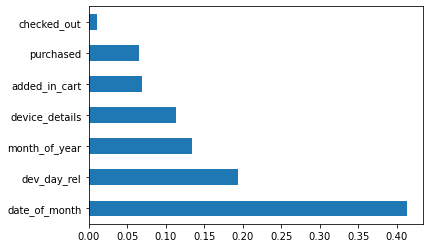

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

RegModel=DecisionTreeRegressor()
Mdl=RegModel.fit(X_train,y_train)
prediction=Mdl.predict(X_test)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(Mdl.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

# PCA Incorportation

In [132]:
from sklearn.decomposition import PCA

Target = Data4ML['time_spent']
OnlyPred = Data4ML.drop('time_spent',axis=1)

X = OnlyPred.values
y = Target.values

PCA_Numeric_reduced = PCA(n_components = 1)
principalComponents_train = PCA_Numeric_reduced.fit_transform(X)
var_explained= PCA_Numeric_reduced.explained_variance_ratio_
print(np.round(var_explained,2))

[0.87]


In [133]:
Reduced = pd.DataFrame(data = principalComponents_train, columns = ['PC1'])
Reduced['time_spent'] = y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Reduced[['PC1']].values, Reduced['time_spent'].values, test_size=0.3, random_state=5)

In [134]:
RegLoop(X_train,y_train,X_test)

{sklearn.linear_model._base.LinearRegression: 2.34,
 sklearn.tree._classes.DecisionTreeRegressor: 1.15,
 sklearn.ensemble._forest.RandomForestRegressor: 1.48,
 sklearn.ensemble._weight_boosting.AdaBoostRegressor: 3.53,
 xgboost.sklearn.XGBRegressor: 1.89,
 sklearn.svm._classes.SVR: 1.79,
 sklearn.linear_model._ridge.Ridge: 2.34,
 sklearn.linear_model._coordinate_descent.Lasso: 2.34,
 sklearn.neighbors._regression.KNeighborsRegressor: 1.84}

# Hyper Parameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

Selected_Pred = ['PC1']
Target_Var = 'time_spent'

X_final = Reduced[Selected_Pred]
y_final = Reduced[Target_Var]

parameters = {'criterion':('mse',  'mae', 'friedman_mse','poisson' ), 'max_depth':[75,100,125,150],
              'splitter':('best','random')}

RegModel = DecisionTreeRegressor()
clf = GridSearchCV(RegModel, parameters)
clf.fit(X_final, y_final)
clf.best_params_

C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

{'criterion': 'mae', 'max_depth': 100, 'splitter': 'random'}

## Retraining the Model Using 100% of the Sample Data and Exporting to the Pickle File

In [114]:
df_train = pd.read_csv('Train.csv')

Month_of_Year = []
Date_of_Month = []
Year_Tranc = []

for i in df_train['date']:
    x = i.split('-')
    Year_Tranc.append(x[0])
    Month_of_Year.append(x[1])
    Date_of_Month.append(x[2])
    

df_train['month_of_year'] = pd.DataFrame(Month_of_Year)
df_train['date_of_month'] = pd.DataFrame(Date_of_Month)
df_train['year_tranc'] = pd.DataFrame(Year_Tranc)

Day_Week = []

for i in df_train['date']:
    tranc = datetime.strptime(i, '%Y-%m-%d')
    wk = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    Day_Week.append(wk[tranc.weekday()])
    
df_train['day_of_week'] = pd.DataFrame(Day_Week)

df_train['day_of_week'].replace({'Friday':7, 'Monday':6,'Saturday':4,'Sunday':3,'Thursday':2,'Tuesday':5,'Wednesday':1},
                                inplace=True)
df_train.drop(['year_tranc'],axis=1,inplace=True)
df_train['device_details'].replace({
    'Desktop - Firefox':17,'iPad - iOS':16,'Android Phone - Android':15,'Desktop - Safari':14,'Android Tablet - Android':13,
    'iPhone - iOS':12,'Desktop - IE':11,'iPad - Web':10,'Desktop - Chrome':9,'iPhone - Web':8,'Android Tablet - Web':7,
    'Android Phone - MobileWeb':6, 'Android Tablet - MobileWeb':5, 'Android Phone - Web':4, 'iPhone - MobileWeb':3,
    'Unknown - MobileWeb':2, 'Other - Other':1
}, inplace = True)
df_train['dev_day_rel'] = pd.DataFrame(df_train['device_details']*df_train['day_of_week'])

Selected_Pred = ['device_details','purchased','month_of_year','date_of_month','added_in_cart','checked_out','dev_day_rel']

# Creadting a New Data Frame with the Selected Columns

Data4ML = df_train[Selected_Pred]
Data4ML['time_spent'] = df_train['time_spent']

# Separate Target Variable and Predictor Variables
TargetVariable='time_spent'
Predictors=Data4ML.drop('time_spent',axis=1)

y_final=Data4ML[TargetVariable].values
X_final=Predictors.values

RegModel = DecisionTreeRegressor()
Final_DT_Model = RegModel.fit(X_final,y_final)

import pickle
import os

with open('Final_DT_Model2.pkl','wb') as fileWriteStream:
    pickle.dump(Final_DT_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\ASHUTOSH DAS\Documents\Machine Hack


<ipython-input-114-fb2c2ae0d0ad>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data4ML['time_spent'] = df_train['time_spent']


## Retraining the Model Using 100% of the Sample Data and Exporting to the Pickle File (for PCA Approach)

In [138]:
df_train = pd.read_csv('Train.csv')

Month_of_Year = []
Date_of_Month = []
Year_Tranc = []

for i in df_train['date']:
    x = i.split('-')
    Year_Tranc.append(x[0])
    Month_of_Year.append(x[1])
    Date_of_Month.append(x[2])
    

df_train['month_of_year'] = pd.DataFrame(Month_of_Year)
df_train['date_of_month'] = pd.DataFrame(Date_of_Month)
df_train['year_tranc'] = pd.DataFrame(Year_Tranc)

Day_Week = []

for i in df_train['date']:
    tranc = datetime.strptime(i, '%Y-%m-%d')
    wk = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    Day_Week.append(wk[tranc.weekday()])
    
df_train['day_of_week'] = pd.DataFrame(Day_Week)

df_train['day_of_week'].replace({'Friday':7, 'Monday':6,'Saturday':4,'Sunday':3,'Thursday':2,'Tuesday':5,'Wednesday':1},
                                inplace=True)
df_train.drop(['year_tranc'],axis=1,inplace=True)
df_train['device_details'].replace({
    'Desktop - Firefox':17,'iPad - iOS':16,'Android Phone - Android':15,'Desktop - Safari':14,'Android Tablet - Android':13,
    'iPhone - iOS':12,'Desktop - IE':11,'iPad - Web':10,'Desktop - Chrome':9,'iPhone - Web':8,'Android Tablet - Web':7,
    'Android Phone - MobileWeb':6, 'Android Tablet - MobileWeb':5, 'Android Phone - Web':4, 'iPhone - MobileWeb':3,
    'Unknown - MobileWeb':2, 'Other - Other':1
}, inplace = True)
df_train['dev_day_rel'] = pd.DataFrame(df_train['device_details']*df_train['day_of_week'])

Selected_Pred = ['device_details','purchased','month_of_year','date_of_month','added_in_cart','checked_out','dev_day_rel']

# Creating a New Data Frame with the Selected Columns

Data4ML = df_train[Selected_Pred]
Data4ML['time_spent'] = df_train['time_spent']

# Separate Target Variable and Predictor Variables
TargetVariable='time_spent'
Predictors=Data4ML.drop('time_spent',axis=1)

y_final=Data4ML[TargetVariable].values
X_final=Predictors.values

PCA_Numeric_reduced = PCA(n_components = 1)
principalComponents_train = PCA_Numeric_reduced.fit_transform(X_final)

RegModel = DecisionTreeRegressor(criterion='mae',splitter='random',max_depth=100)
Final_DT_Model = RegModel.fit(X_final,y_final)

import pickle
import os

with open('Final_DT_Model2.pkl','wb') as fileWriteStream:
    pickle.dump(Final_DT_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

<ipython-input-138-d1ce600de300>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data4ML['time_spent'] = df_train['time_spent']


pickle file of Predictive Model is saved at Location: C:\Users\ASHUTOSH DAS\Documents\Machine Hack


# Function for Predictions

In [155]:
def FunctionPredictResult(InputData):
    Month_of_Year = []
    Date_of_Month = []
    Year_Tranc = []

    for i in df_train['date']:
        x = i.split('-')
        Year_Tranc.append(x[0])
        Month_of_Year.append(x[1])
        Date_of_Month.append(x[2])
    

    InputData['month_of_year'] = pd.DataFrame(Month_of_Year)
    InputData['date_of_month'] = pd.DataFrame(Date_of_Month)
    InputData['year_tranc'] = pd.DataFrame(Year_Tranc)

    Day_Week = []

    for i in InputData['date']:
        tranc = datetime.strptime(i, '%Y-%m-%d')
        wk = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
        Day_Week.append(wk[tranc.weekday()])
    
    InputData['day_of_week'] = pd.DataFrame(Day_Week)

    InputData['day_of_week'].replace({'Friday':7, 'Monday':6,'Saturday':4,'Sunday':3,'Thursday':2,'Tuesday':5,'Wednesday':1},
                                inplace=True)
    InputData.drop(['year_tranc'],axis=1,inplace=True)
    InputData['device_details'].replace({
        'Desktop - Firefox':17,'iPad - iOS':16,'Android Phone - Android':15,'Desktop - Safari':14,'Android Tablet - Android':13,
        'iPhone - iOS':12,'Desktop - IE':11,'iPad - Web':10,'Desktop - Chrome':9,'iPhone - Web':8,'Android Tablet - Web':7,
        'Android Phone - MobileWeb':6, 'Android Tablet - MobileWeb':5, 'Android Phone - Web':4, 'iPhone - MobileWeb':3,
        'Unknown - MobileWeb':2, 'Other - Other':1
        }, inplace = True)
    InputData['dev_day_rel'] = pd.DataFrame(df_train['device_details']*df_train['day_of_week'])

    Selected_Pred = ['device_details','purchased','month_of_year','date_of_month','added_in_cart','checked_out','dev_day_rel']

    # Creating a New Data Frame with the Selected Columns

    X_final=InputData[Selected_Pred].values

    PCA_Numeric_reduced = PCA(n_components = 1)
    principalComponents_train = PCA_Numeric_reduced.fit_transform(X_final)

    # Loading the Function from pickle file
    import pickle
    with open('Final_DT_Model2.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X_final)
    PredictionResult=pd.DataFrame(Prediction, columns=['time_spent'])
    PredictionResult.to_csv('my_submission_file_feat.csv', index=False)
    return(round(PredictionResult))

In [156]:
df_test = pd.read_csv('Test.csv')
FunctionPredictResult(df_test)

,time_spent
0,237.0
1,51.0
2,1219.0
3,177.0
4,23.0
...,...
2322,24.0
2323,375.0
2324,91.0
2325,2995.0
